In [1]:
import xarray as xr
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from netCDF4 import Dataset
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Load FSLE data (downloaded from AVISO)

In [2]:
da = xr.open_dataset("~/Work/data/dipole_work/dataset-duacs-dt-global-allsat-madt-fsle_1543203294191.nc")
da

<xarray.Dataset>
Dimensions:    (lat: 176, lon: 251, time: 21)
Coordinates:
  * time       (time) datetime64[ns] 2017-09-10 2017-09-11 ... 2017-09-30
  * lat        (lat) float32 -37.98 -37.94 -37.9 -37.86 ... -31.06 -31.02 -30.98
  * lon        (lon) float32 145.5 145.54 145.58 145.62 ... 155.42 155.46 155.5
Data variables:
    fsle_max   (time, lat, lon) float32 ...
    theta_max  (time, lat, lon) float32 ...
Attributes:
    _NCProperties:              version=1|netcdflibversion=4.4.1|hdf5libversi...
    cdm_data_type:              Grid
    Conventions:                CF-1.6
    standard_name_vocabulary:   http://cf-pcmdi.llnl.gov/documents/cf-standar...
    title:                      Backward-in-time, finite-size Lyapunov expone...
    geospatial_lat_min:         -37.97999954223633
    geospatial_lat_max:         -30.979999542236328
    geospatial_lon_min:         145.5
    geospatial_lon_max:         155.5
    geospatial_vertical_min:    0.0
    geospatial_vertical_max:    0.0
   

# Load MODIS Oceancolour data (downloaded from AODN)

In [4]:
chla = xr.open_dataset('~/Work/data/dipole_work/IMOS_aggregation_20181127T040543Z.nc',decode_times=False)
chla

<xarray.Dataset>
Dimensions:    (latitude: 1301, longitude: 1001, time: 11)
Coordinates:
  * latitude   (latitude) float64 -27.0 -27.01 -27.02 ... -39.98 -39.99 -40.0
  * time       (time) float64 7.951e+04 7.951e+04 ... 7.952e+04 7.952e+04
  * longitude  (longitude) float64 145.0 145.0 145.0 145.0 ... 155.0 155.0 155.0
Data variables:
    chl_oc3    (time, latitude, longitude) float32 ...
    l2_flags   (time, latitude, longitude) float64 ...
Attributes:
    source_path:                      imos-srs/archive/oc/aqua/1d/v201508/201...
    compliance_checks_passed:         cf
    compliance_checker_version:       2.3.1
    compliance_checker_imos_version:  1.1.2
    history:                          Wed Sep 27 05:24:30 2017: ncks -A -v l2...
    NCO:                              4.0.9
    Conventions:                      CF-1.6
    time_coverage_start:              2017-09-10T00:00:00Z
    time_coverage_end:                2017-09-20T00:00:00Z
    title:                            ${1}

# Load MODIS SST data (downloaded from AODN)

In [5]:
ds = xr.open_dataset("~/Work/data/dipole_work/IMOS_aggregation_20181114T040217Z.nc")
ds

<xarray.Dataset>
Dimensions:    (latitude: 1301, longitude: 1001, time: 11)
Coordinates:
  * latitude   (latitude) float64 -27.0 -27.01 -27.02 ... -39.98 -39.99 -40.0
  * time       (time) datetime64[ns] 2017-09-10 2017-09-11 ... 2017-09-20
  * longitude  (longitude) float64 145.0 145.0 145.0 145.0 ... 155.0 155.0 155.0
Data variables:
    sst        (time, latitude, longitude) float32 ...
Attributes:
    source_path:                      imos-srs/archive/oc/aqua/1d/v201508/201...
    compliance_checks_passed:         cf
    compliance_checker_version:       2.3.1
    compliance_checker_imos_version:  1.1.2
    history:                          File initialised at 2017-09-26T19:21:11...
    Conventions:                      CF-1.6
    time_coverage_start:              2017-09-10T00:00:00Z
    time_coverage_end:                2017-09-20T00:00:00Z
    title:                            ${1}, 2017-09-10T00:00:00Z, 2017-09-20T...
    geospatial_lat_min:               -40.0
    geospatial_l

In [6]:
ds_mean=ds.mean(dim='time')
ds_mean

/home/z3526974/anaconda2/lib/python2.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:    (latitude: 1301, longitude: 1001)
Coordinates:
  * latitude   (latitude) float64 -27.0 -27.01 -27.02 ... -39.98 -39.99 -40.0
  * longitude  (longitude) float64 145.0 145.0 145.0 145.0 ... 155.0 155.0 155.0
Data variables:
    sst        (latitude, longitude) float32 nan nan nan ... 15.115 15.24875

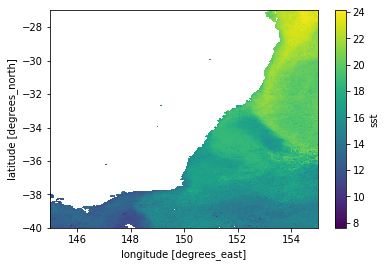

In [7]:
ds_mean.sst.plot()

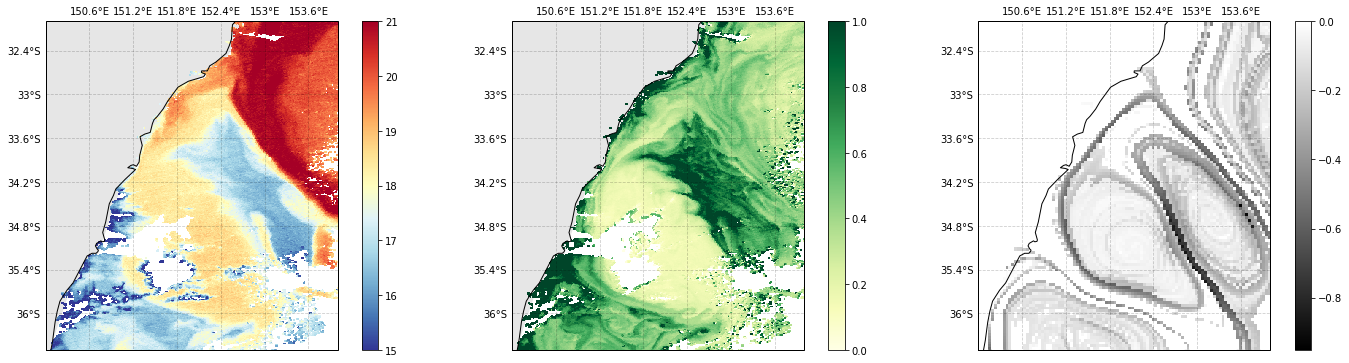

In [8]:
sst_mean=ds_mean.sst
lat=ds.latitude
lon=ds.longitude

plt.figure(figsize=(20, 5))
ax1 = plt.subplot(1,3,1, projection=ccrs.PlateCarree())
plt.pcolormesh(lon, lat, ds.sst.isel(time=5),vmin=15,vmax=21, cmap='RdYlBu_r',
             transform=ccrs.PlateCarree())
plt.colorbar()

ax1.coastlines(resolution='50m')
ax1.set_extent([150, 154, -36.5, -32])
gl = ax1.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabels_right = False
gl.xlabels_bottom = False
ax1.add_feature(cfeature.LAND, facecolor='0.9') #Grayscale colors can be set using 0 (black) to 1 (white)
ax1.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
ax1.add_feature(cfeature.BORDERS, zorder=10)

ax1 = plt.subplot(1,3,2, projection=ccrs.PlateCarree())
plt.pcolormesh(chla.longitude, chla.latitude, chla.chl_oc3.isel(time=5), cmap='YlGn', vmin=0, vmax=1,
             transform=ccrs.PlateCarree())
plt.colorbar()

ax1.coastlines(resolution='50m')
ax1.set_extent([150, 154, -36.5, -32])
gl = ax1.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabels_right = False
gl.xlabels_bottom = False
ax1.add_feature(cfeature.LAND, facecolor='0.9') #Grayscale colors can be set using 0 (black) to 1 (white)
ax1.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
ax1.add_feature(cfeature.BORDERS, zorder=10)

ax1 = plt.subplot(1,3,3, projection=ccrs.PlateCarree())
plt.pcolormesh(da.lon, da.lat, da.fsle_max.sel(time="2017-09-15"), cmap='gray',
             transform=ccrs.PlateCarree())
plt.colorbar()

ax1.coastlines(resolution='50m')
ax1.set_extent([150, 154, -36.5, -32])
gl = ax1.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabels_right = False
gl.xlabels_bottom = False

#ax1.add_feature(cfeature.LAND, facecolor='tan') #Grayscale colors can be set using 0 (black) to 1 (white)
ax1.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
plt.tight_layout()